<a href="https://colab.research.google.com/github/Viswanth13/PDS_Asg1_Viswanth/blob/main/Question_2/src/Viswanth_PDS_Asg1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment-1, Q2

Perform 5 data visualization tasks on the student performance dataset given in the link below (create
5 different visualizations). Explain what kind analysis has become easier with each of the visualizations.
Create the folder structure for this question similar to question 1.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
# importing the data
df = pd.read_csv('/content/students_project/data_raw/StudentsPerformance.csv')
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [19]:
# strip the trailing spaces
df.columns = df.columns.str.strip()

In [20]:
# renaming the columns (to remove spaces in column names)
df.rename(columns = {'race/ethnicity':'race_ethnicity',
                     'parental level of education':'parental_level_of_education',
    'test preparation course':'test_preparation_course',
                       'math score':'math_score',
                       'reading score':'reading_score',
                        'writing score':'writing_score'}, inplace = True)

In [21]:
# save cleaned df
df.to_csv('/content/students_project/data_clean/Clean_StudentsPerformance.csv')
# print(df.head())
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


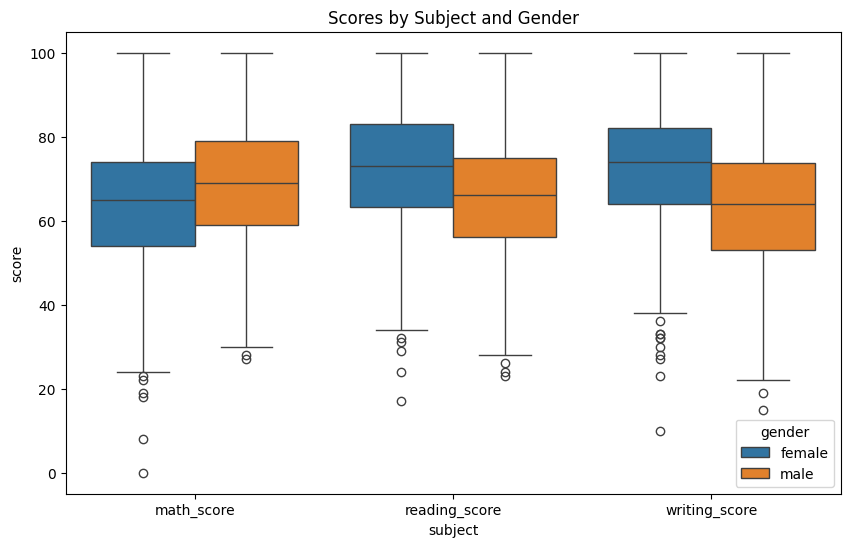

In [25]:
# Visualization 1

# Boxplot of Math, Reading, and Writing Scores by Gender

# Melt the DataFrame to reshape it
melted_df = pd.melt(df, id_vars=['gender'], value_vars=['math_score', 'reading_score', 'writing_score'],
                    var_name='subject', value_name='score')

# Create the plot
plt.figure(figsize=(10, 6))
bx_plot = sns.boxplot(data=melted_df, x='subject', y='score', hue='gender')
plt.title('Scores by Subject and Gender')
plt.show()

fig1 = bx_plot.get_figure()
fig1.savefig("/content/students_project/results/MWR.png")


From the above boxplot, we can understand that female gender has higher average scores in reading and writing, but in math male are slightly higher.

<ipython-input-34-e6ef11dff6ca>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  br_plot = sns.barplot(data=melted_df, x='race_ethnicity', y='score', hue='subject', ci=None)


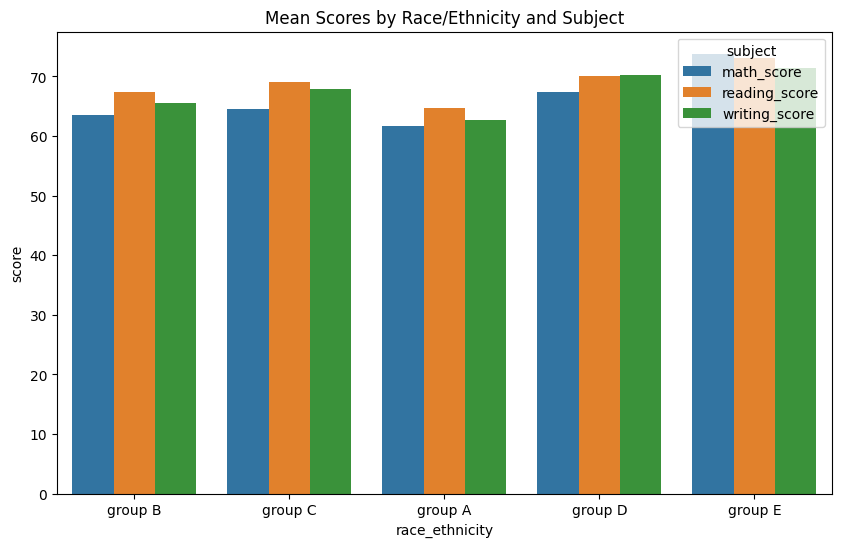

In [34]:
# Visualization 2

# Melt the DataFrame to reshape it
melted_df = pd.melt(df, id_vars=['race_ethnicity'], value_vars=['math_score', 'reading_score', 'writing_score'],
                    var_name='subject', value_name='score')

# Create the plot
plt.figure(figsize=(10, 6))
br_plot = sns.barplot(data=melted_df, x='race_ethnicity', y='score', hue='subject', ci=None)
plt.title('Mean Scores by Race/Ethnicity and Subject')
plt.show()

fig2 = br_plot.get_figure()
fig2.savefig("/content/students_project/results/Ethnicity.png")

It can be observed that group E has higher scores in all the 3 subjects.

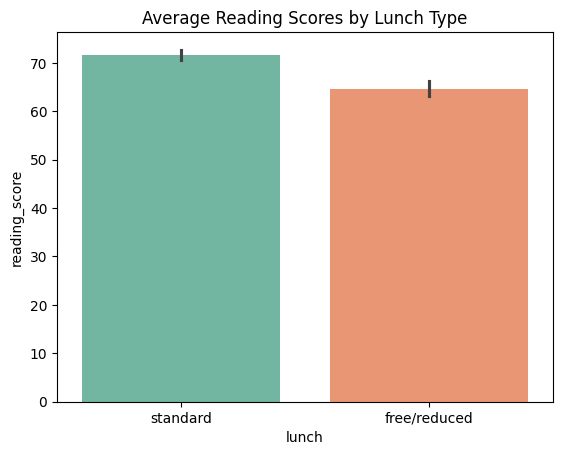

In [35]:
# Visualization 3

# Bar chart comparing average scores by lunch type

lun_plot = sns.barplot(x="lunch", y="reading_score", data=df, hue="lunch", palette="Set2")
plt.title("Average Reading Scores by Lunch Type")
plt.show()

fig3 = lun_plot.get_figure()
fig3.savefig("/content/students_project/results/Lunch.png")

We can infer from this visualization that the students with standard lunch type have scored better than the other type,

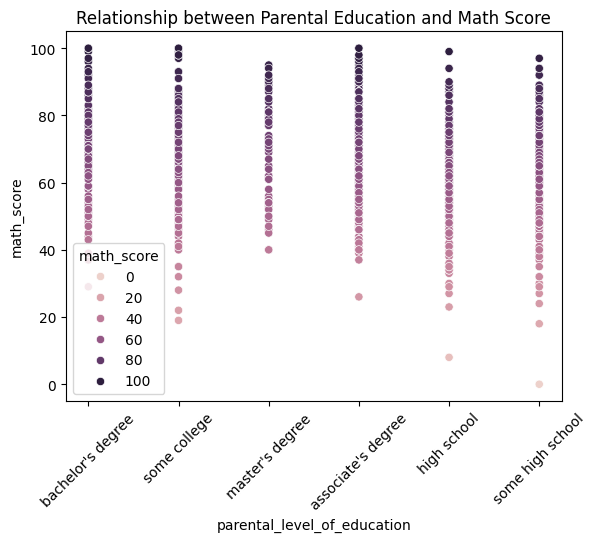

In [38]:
# Visualization 4

# Visualization 2: Relationship between parental education and test scores
sc_plot = sns.scatterplot(x="parental_level_of_education", y="math_score", data=df, hue = "math_score")
plt.title("Relationship between Parental Education and Math Score")
plt.xticks(rotation=45)
plt.show()

fig4 = sc_plot.get_figure()
fig4.savefig("/content/students_project/results/Parent.png")

The above visualization is a Relationship between parental education and math score. Seems like the parameter "parental_level_of_education" does not have much effect on the math scores of the students.

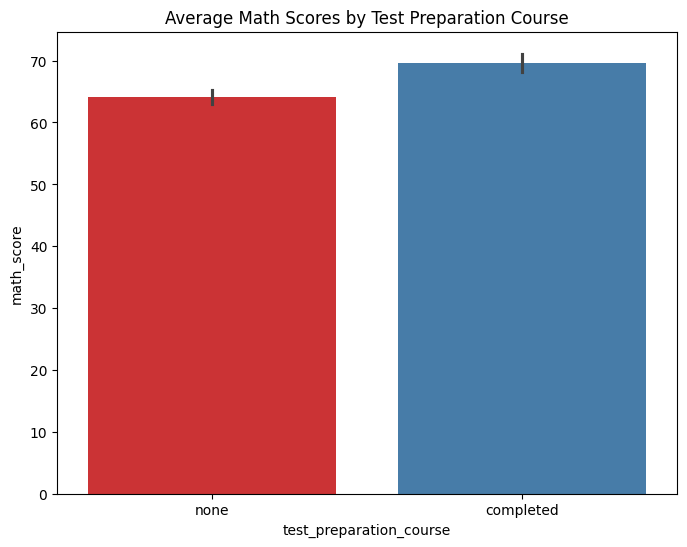

In [44]:
# Visualization 5

#  Bar chart comparing average scores by test preparation course
plt.figure(figsize=(8, 6))
math_plot = sns.barplot(x="test_preparation_course", y="math_score", data=df,hue="test_preparation_course", palette="Set1")
plt.title("Average Math Scores by Test Preparation Course")
plt.show()

fig5 = math_plot.get_figure()
fig5.savefig("/content/students_project/results/math_completion.png")

Visualization 5 shows a bar chart comparing average scores by test preparation course. Students who have completed preparation have scored better.